# Pymaceuticals Inc.
---

### Analysis

- The First conclusion we can make is that Capomulin and Ramicane treatments seem to correlate with lower tumor volume over time.  The boxplot figure generated to show distribution of tumor volume for each treatment group bears this conclusion out while also showing that the only outlier datapoint based on lower and upper bound in this limited set belongs to the infubinol treatment group. Secondly, one can confirm on an annectodal basis that in the case of Mouse 'l509' capolmulin treatment correlated with a shrinking of tumor volume. Lastly, the scatter plot of mouse weight vs. average observed tumor volume in the Capomulin regimen group showed a positive correlation between the two factors.  With a pearson r coefficient of .84 this correlation is mathimatically substantiated and illustrated with the provided regression line. 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df = pd.DataFrame(merged_data)
# Display the data table for preview

merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].nunique()
mouse_count

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()
unique_duplicate_mice

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_df = merged_df[merged_df['Mouse ID'] == 'g989']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = "g989"
cleaned_data = merged_df[merged_df["Mouse ID"] != mouse_to_drop]

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = len(cleaned_data["Mouse ID"].unique())
unique_mice_count

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
named_summary_stats = summary_stats.rename(columns={"mean":"Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
named_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

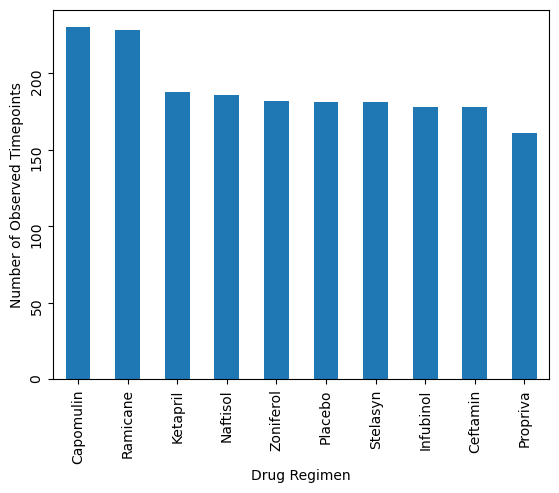

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = merged_data["Drug Regimen"].value_counts()
bar_chart = timepoint_counts.plot(kind="bar")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Observed Timepoints")
bar_chart.tick_params(rotation=90)

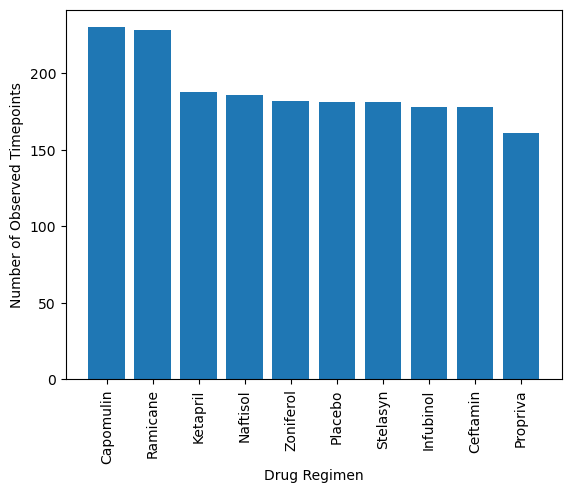

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = cleaned_data["Drug Regimen"].value_counts()
plt.bar(timepoint_counts.index, drug_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

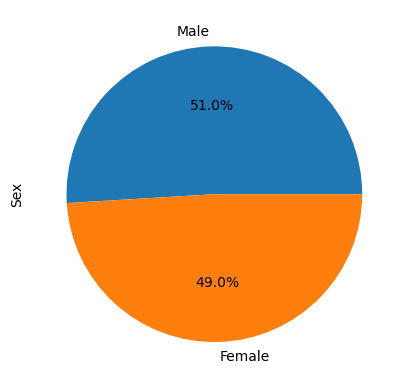

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data["Sex"].value_counts()
pie_chart = sex_counts.plot(kind="pie", autopct='%1.1f%%')
pie_chart.set_ylabel("Sex")
pie_chart

<function matplotlib.pyplot.show(close=None, block=None)>

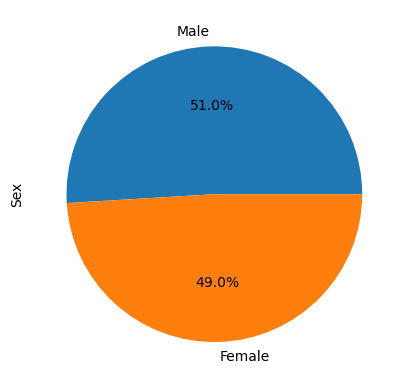

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data["Sex"].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens_data = cleaned_data[cleaned_data["Drug Regimen"].isin(regimens)]



# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tumor_volume = pd.merge(greatest_timepoints, regimens_data, on=["Mouse ID", "Timepoint"])
greatest_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = greatest_tumor_volume.loc[greatest_tumor_volume["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol.append(tumor_vol_subset)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_subset.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    outliers
    
    print(f"{regimen}'s Potential outliers:")
    if outliers.empty:
        print("")
    else:
        print(outliers)

Capomulin's Potential outliers:

Ramicane's Potential outliers:

Infubinol's Potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential outliers:



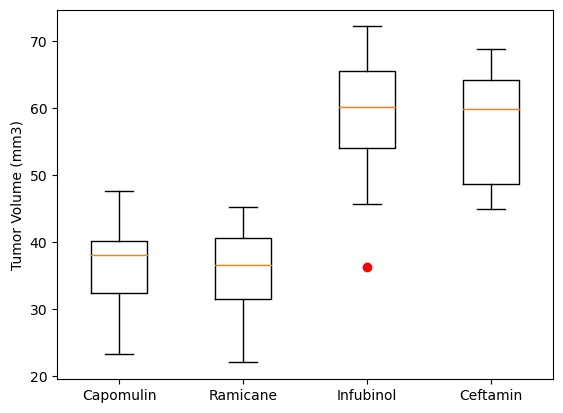

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_vol, labels=treatments, sym='ro')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

/var/folders/3v/2t63jrqs1n531nz370m929h80000gn/T/ipykernel_82682/564096983.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capomulin_data = cleaned_data[merged_data["Drug Regimen"] == "Capomulin"]


<function matplotlib.pyplot.show(close=None, block=None)>

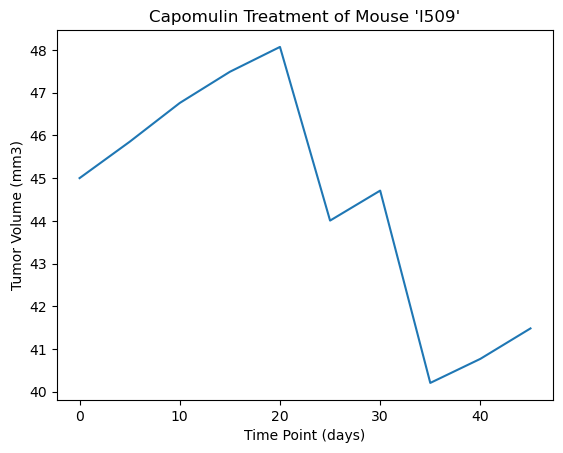

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[merged_data["Drug Regimen"] == "Capomulin"]

mouse_id = 'l509'

single_mouse = capomulin_data [capomulin_data["Mouse ID"] == mouse_id]

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], linestyle='-')
plt.title("Capomulin Treatment of Mouse 'l509'")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

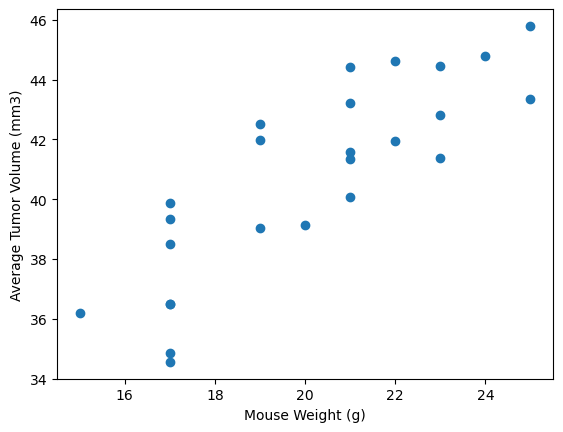

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_vs_volume = capomulin_data.groupby("Mouse ID").agg({
    "Tumor Volume (mm3)": "mean",
    "Weight (g)": "first"})

plt.scatter(weight_vs_volume["Weight (g)"], weight_vs_volume["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


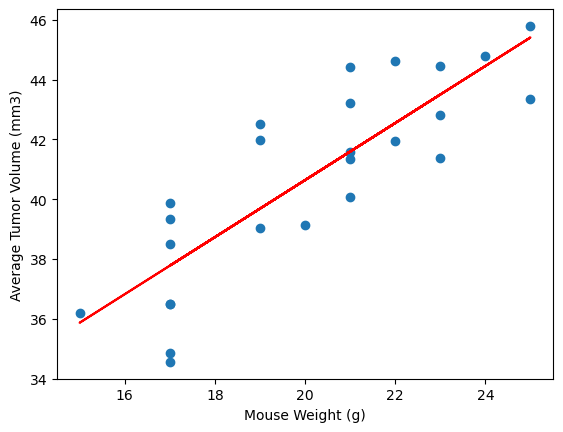

In [89]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight_vs_volume.iloc[:,1]
volume = weight_vs_volume.iloc[:,0]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

slope, intercept, r, p, std_err = st.linregress(weight, volume)
fit = slope * weight + intercept

plt.scatter(weight_vs_volume["Weight (g)"], weight_vs_volume["Tumor Volume (mm3)"], marker="o")
plt.plot(weight,fit, "-", color='red')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [86]:
weight = weight_vs_volume.iloc[:,1]
volume = weight_vs_volume.iloc[:,0]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [84]:
print(weight_vs_volume)

          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636          22
b742               40.083699          21
f966               36.505973          17
g288               41.990097          19
g316               44.613344          22
i557               44.805810          24
i738               39.141053          20
j119               44.465236          23
j246               43.216925          21
l509               44.434474          21
l897               42.507261          19
m601               34.847470          17
m957               39.049816          19
r157               45.798970          25
r554               36.509212          17
r944               43.367364          25
s185               34.559143          17
s710               42.803733          23
t565               39.328725          17
u364               39.887495          17
v923               41.581595          21
w150               41.384825          23
w914            